In [1]:
!pip install xgboost

In [3]:
!pip install lightgbm

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [7]:
### Load dataset into python
climatedata=pd.read_csv('climate_change_impact_on_agriculture.csv')

In [9]:
### calling data out
climatedata

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022,France,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,No Adaptation,1483.06
9996,1999,Australia,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,No Adaptation,829.61
9997,2000,Argentina,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,Water Management,155.99
9998,1996,Brazil,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,Crop Rotation,1613.90


In [7]:
### to see first 5 records in the data
climatedata.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [9]:
### to see last 5 records in the data
climatedata.tail()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
9995,2022,France,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,No Adaptation,1483.06
9996,1999,Australia,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,No Adaptation,829.61
9997,2000,Argentina,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,Water Management,155.99
9998,1996,Brazil,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,Crop Rotation,1613.90
9999,2015,China,South,Corn,11.78,1676.25,5.34,3.710,5,46.41,48.28,98.27,59.38,Water Management,453.14


In [6]:
### display the data info
climatedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [7]:
### change data type for year
climatedata['Year']=pd.to_datetime(climatedata['Year'], format='%Y')

In [8]:
climatedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Year                         10000 non-null  datetime64[ns]
 1   Country                      10000 non-null  object        
 2   Region                       10000 non-null  object        
 3   Crop_Type                    10000 non-null  object        
 4   Average_Temperature_C        10000 non-null  float64       
 5   Total_Precipitation_mm       10000 non-null  float64       
 6   CO2_Emissions_MT             10000 non-null  float64       
 7   Crop_Yield_MT_per_HA         10000 non-null  float64       
 8   Extreme_Weather_Events       10000 non-null  int64         
 9   Irrigation_Access_%          10000 non-null  float64       
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64       
 11  Fertilizer_Use_KG_per_HA     10000 non-nul

In [9]:
### check for number of columns and rows
climatedata.shape

(10000, 15)

In [10]:
### check for summary statistics
climatedata.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007-02-02 12:10:39.360000,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
min,1990-01-01 00:00:00,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999-01-01 00:00:00,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007-01-01 00:00:00,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016-01-01 00:00:00,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024-01-01 00:00:00,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000
std,NaN,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431


In [11]:
### check for null values
climatedata.isnull().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

In [12]:
### checking for duplicates
climatedata.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [13]:
### checking for number of unique categories
climatedata.nunique()

Year                             35
Country                          10
Region                           34
Crop_Type                        10
Average_Temperature_C          3677
Total_Precipitation_mm         9784
CO2_Emissions_MT               2852
Crop_Yield_MT_per_HA            850
Extreme_Weather_Events           11
Irrigation_Access_%            6003
Pesticide_Use_KG_per_HA        4343
Fertilizer_Use_KG_per_HA       6314
Soil_Health_Index              5318
Adaptation_Strategies             5
Economic_Impact_Million_USD    9631
dtype: int64

In [14]:
### checking for unique categories
for col in climatedata.select_dtypes(include='object').columns:
    print(f"Categories in '{col}':")
    print(climatedata[col].unique())
    print("\n")

Categories in 'Country':
['India' 'China' 'France' 'Canada' 'USA' 'Argentina' 'Australia' 'Nigeria'
 'Russia' 'Brazil']


Categories in 'Region':
['West Bengal' 'North' 'Ile-de-France' 'Prairies' 'Tamil Nadu' 'Midwest'
 'Northeast' 'New South Wales' 'Punjab' 'North West' 'South East'
 'Grand Est' 'Northwestern' 'Siberian' 'Northwest' 'Victoria'
 'Nouvelle-Aquitaine' 'South' 'Quebec' 'Southeast' 'Ontario' 'East'
 'Pampas' 'Western Australia' 'Volga' 'Maharashtra'
 'Provence-Alpes-Cote d’Azur' 'West' 'Central' 'North Central' 'Patagonia'
 'Queensland' 'South West' 'British Columbia']


Categories in 'Crop_Type':
['Corn' 'Wheat' 'Coffee' 'Sugarcane' 'Fruits' 'Rice' 'Barley' 'Vegetables'
 'Soybeans' 'Cotton']


Categories in 'Adaptation_Strategies':
['Water Management' 'Crop Rotation' 'No Adaptation' 'Organic Farming'
 'Drought-resistant Crops']




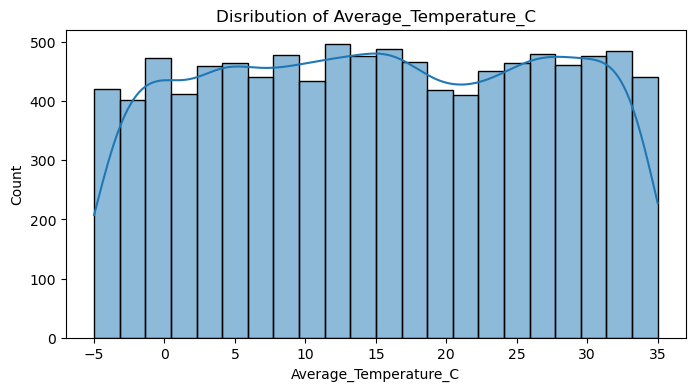

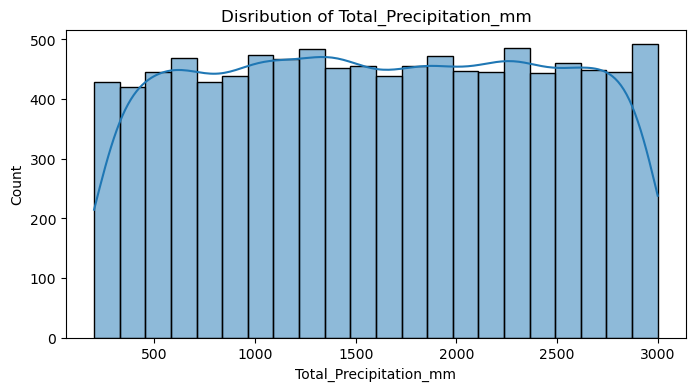

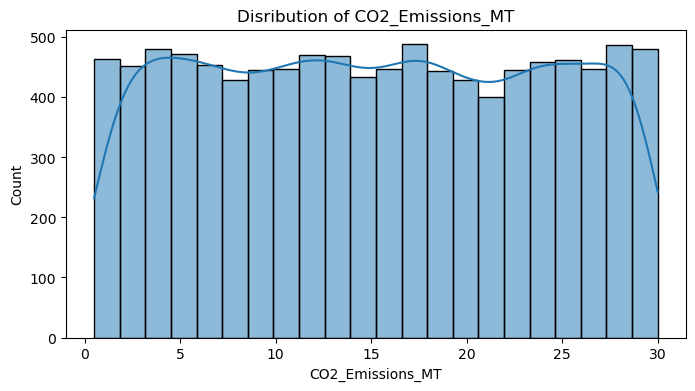

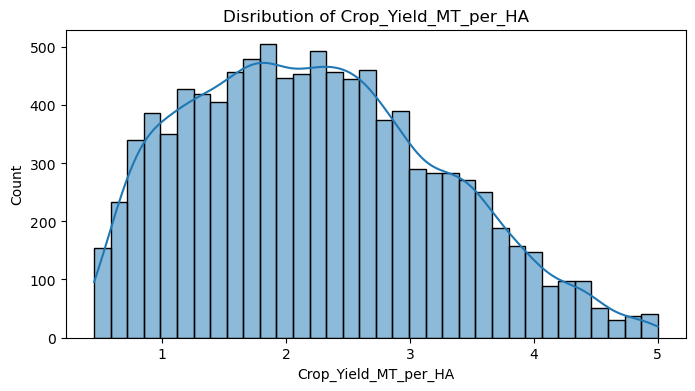

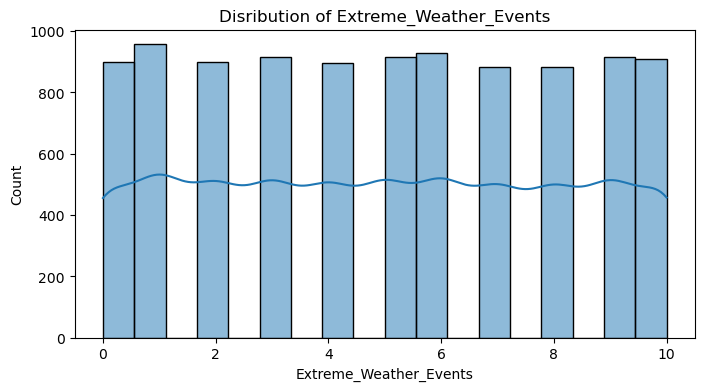

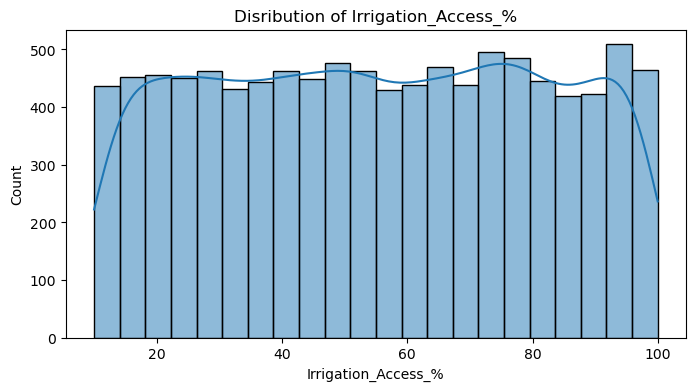

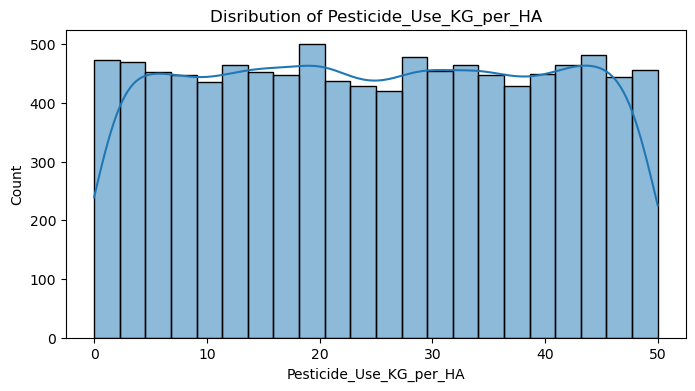

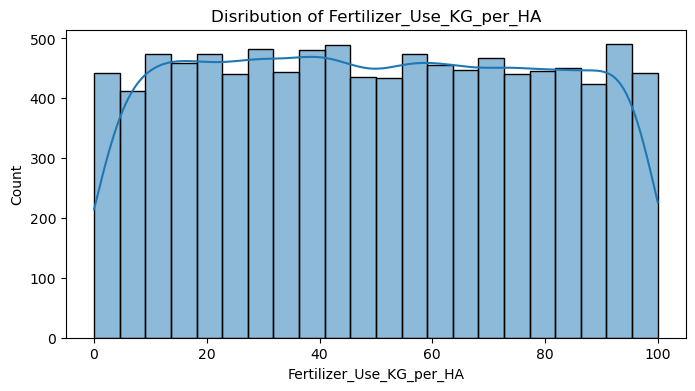

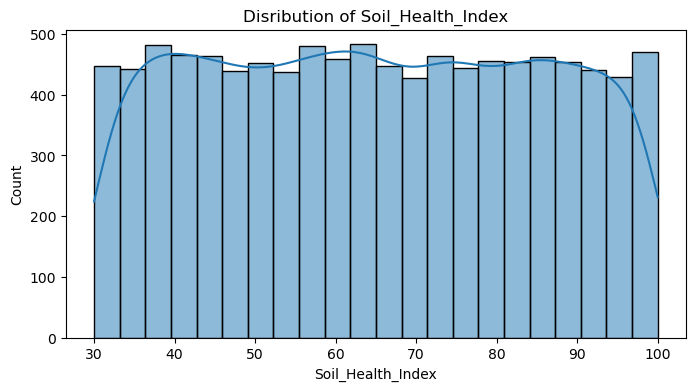

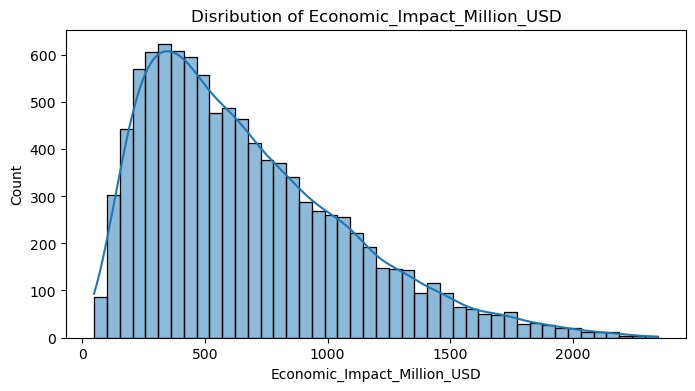

In [15]:
### to check distribution of numerical values
numerical_columns=climatedata.select_dtypes(include = ['int64','float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(climatedata[col],kde= True)
    plt.title(f'Disribution of {col}')
    plt.show()

In [16]:
### Group by Country and Crop_Type, then count occurrences
country_crop_count = climatedata.groupby(['Country', 'Crop_Type']).size().reset_index(name='Count')

print(country_crop_count)

      Country   Crop_Type  Count
0   Argentina      Barley     90
1   Argentina      Coffee     84
2   Argentina        Corn    107
3   Argentina      Cotton     90
4   Argentina      Fruits    109
..        ...         ...    ...
95        USA        Rice    107
96        USA    Soybeans     85
97        USA   Sugarcane     99
98        USA  Vegetables    118
99        USA       Wheat     98

[100 rows x 3 columns]


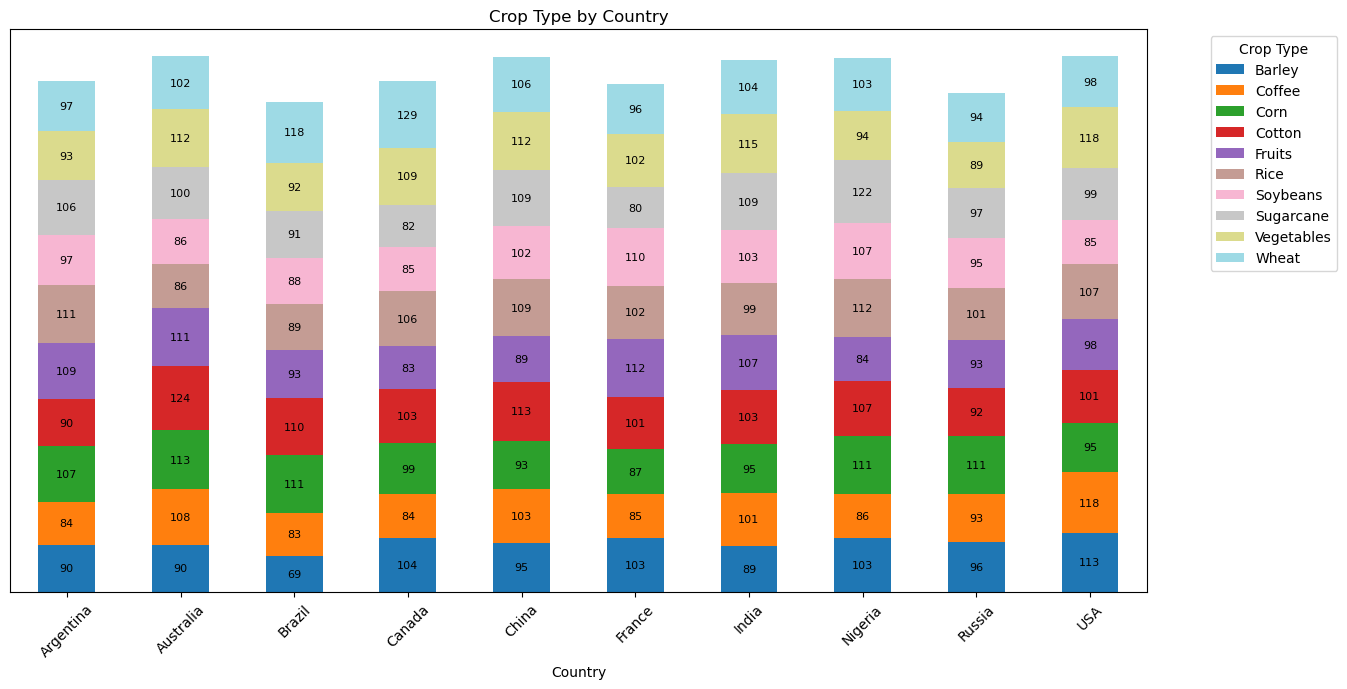

In [17]:
### Group by Country and Crop_Type, then count occurrences
country_crop_count = climatedata.groupby(['Country', 'Crop_Type']).size().reset_index(name='Count')

### Pivot data for stacked bar chart compatibility
country_pivot = country_crop_count.pivot(index='Country', columns='Crop_Type', values='Count').fillna(0)

### Convert all values to integers to ensure compatibility
country_pivot = country_pivot.astype(int)

ax = country_pivot.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 7))

for index, country in enumerate(country_pivot.index):
    cumulative_height = 0 
    for crop_type in country_pivot.columns:
        count = country_pivot.loc[country, crop_type]
        if count > 0:  
            cumulative_height += count
            plt.text(index, cumulative_height - count / 2, f'{count}', ha='center', va='center', fontsize=8, color='black')

plt.title('Crop Type by Country')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
ax.get_yaxis().set_visible(False)
plt.show()

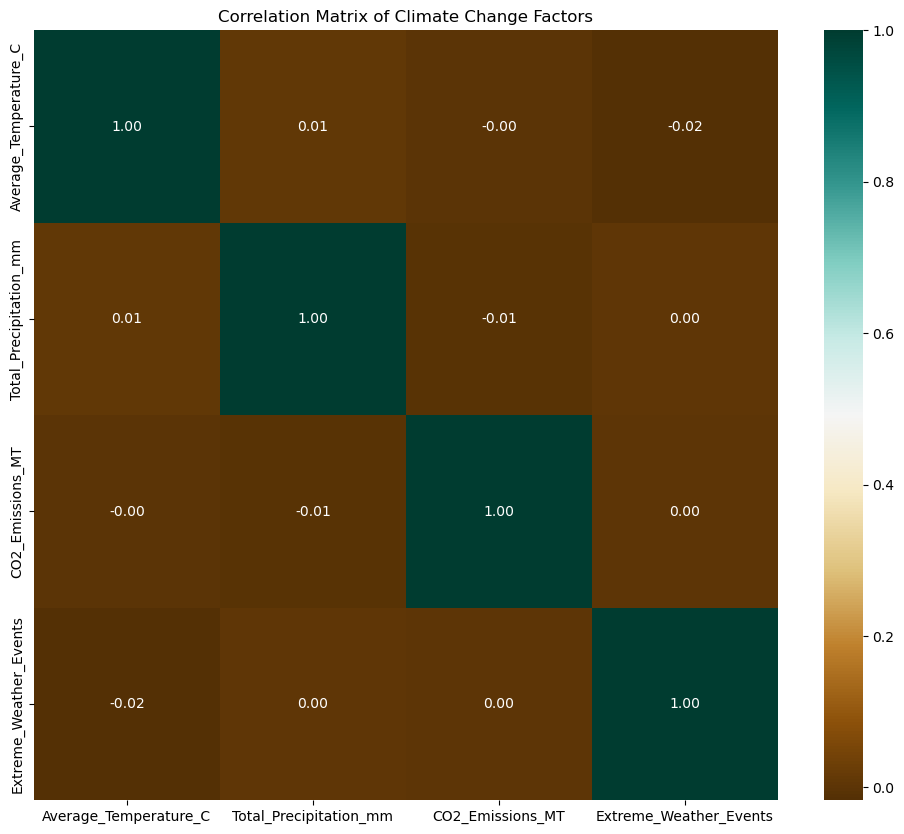

In [61]:
plt.figure(figsize=(12, 10))
correlation_matrix = climatedata[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 
                           'Extreme_Weather_Events']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f')
plt.title('Correlation Matrix of Climate Change Factors')
plt.show()

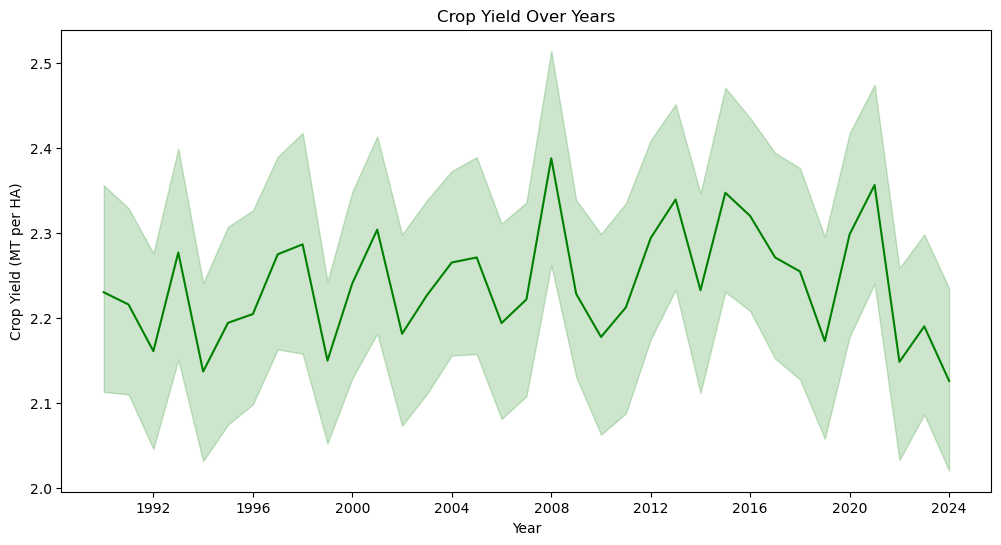

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Crop_Yield_MT_per_HA', data=climatedata, color='green')
plt.title('Crop Yield Over Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.show()

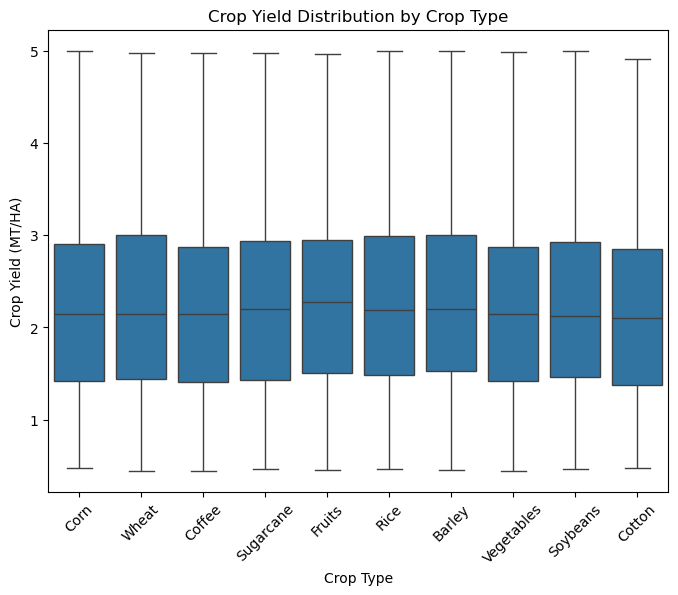

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Crop_Type', y='Crop_Yield_MT_per_HA', data=climatedata)
plt.title('Crop Yield Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Crop Yield (MT/HA)')
plt.xticks(rotation=45)
plt.show()

 The yields across crop types appear to have a similar distribution, with median values between 2 and 3 MT/HA and similar ranges across the crops. This suggests that, while there may be slight variations, the yield distribution is relatively consistent across different crop types.The lines (whiskers) extending from each box show the range of values within 1.5 times the IQR from the box’s edges. Points beyond the whiskers, if present, would be considered outliers, but in this plot, there are no visible outliers.

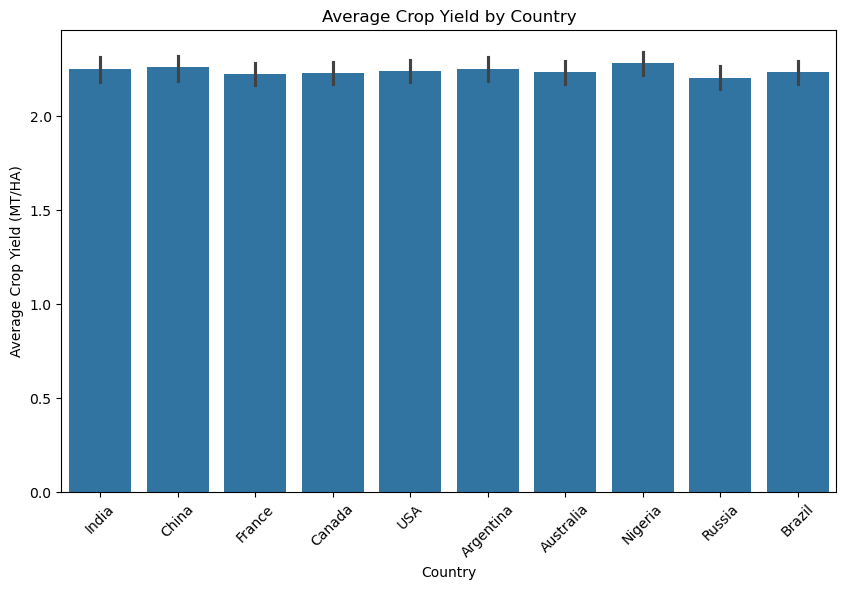

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Crop_Yield_MT_per_HA', data=climatedata)
plt.title('Average Crop Yield by Country')
plt.xlabel('Country')
plt.ylabel('Average Crop Yield (MT/HA)')
plt.xticks(rotation=45)
plt.show()

The average crop yield appears to be similar across all countries, with all values close to 2 MT/HA.
There is minimal variation among the countries, as indicated by the small error bars.

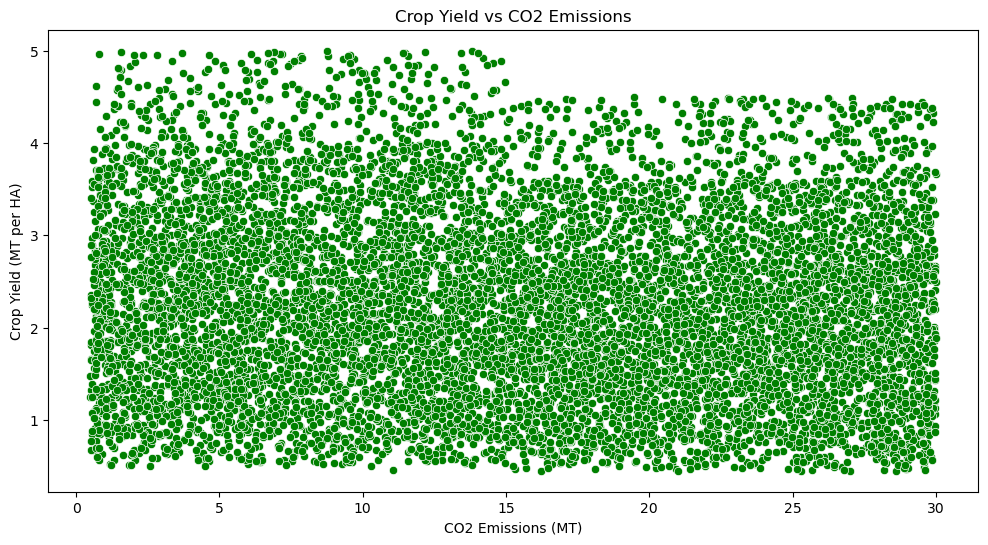

In [65]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CO2_Emissions_MT', y='Crop_Yield_MT_per_HA', data=climatedata, color='green')
plt.title('Crop Yield vs CO2 Emissions')
plt.xlabel('CO2 Emissions (MT)')
plt.ylabel('Crop Yield (MT per HA)')
plt.show()

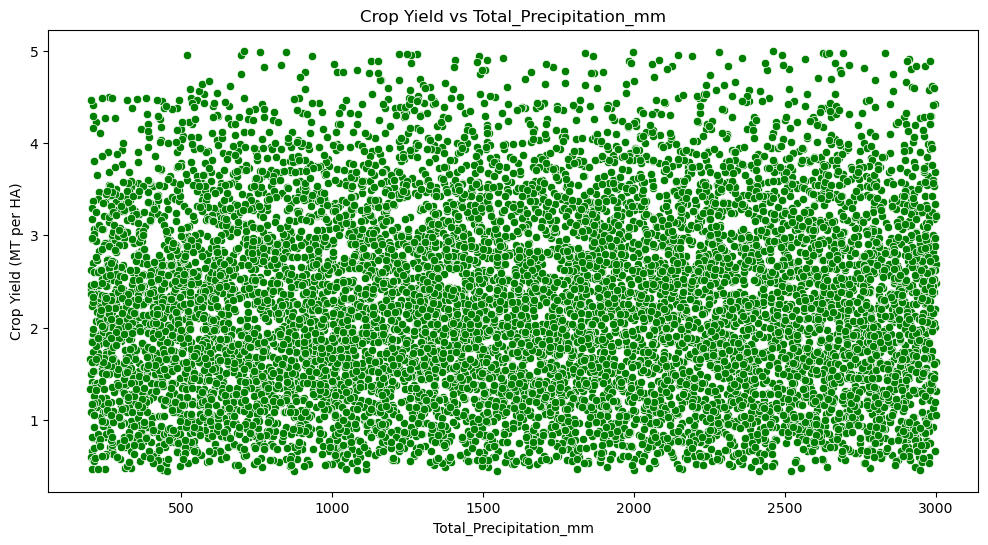

In [69]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Precipitation_mm', y='Crop_Yield_MT_per_HA', data=climatedata, color='green')
plt.title('Crop Yield vs Total_Precipitation_mm')
plt.xlabel('Total_Precipitation_mm')
plt.ylabel('Crop Yield (MT per HA)')
plt.show()

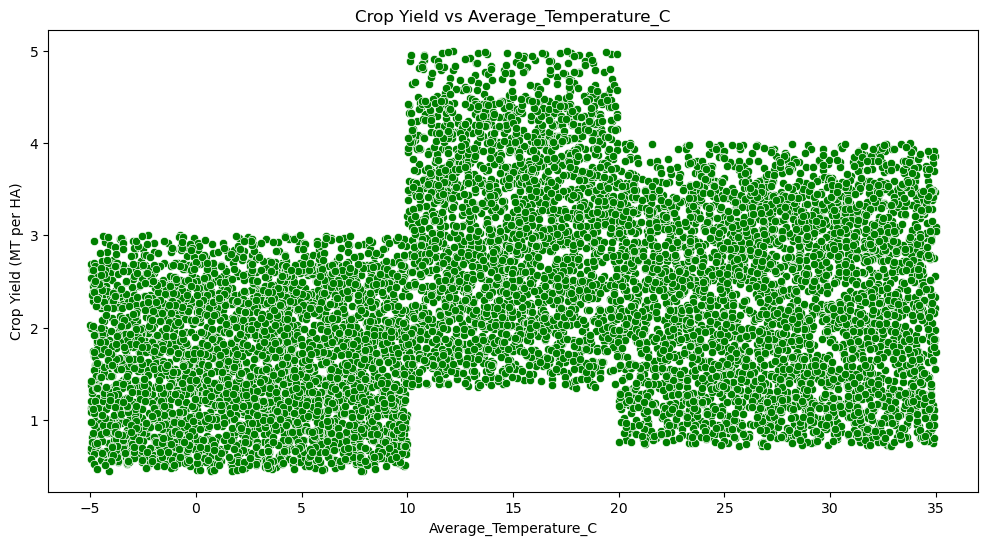

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average_Temperature_C', y='Crop_Yield_MT_per_HA', data=climatedata, color='green')
plt.title('Crop Yield vs Average_Temperature_C')
plt.xlabel('Average_Temperature_C')
plt.ylabel('Crop Yield (MT per HA)')
plt.show()

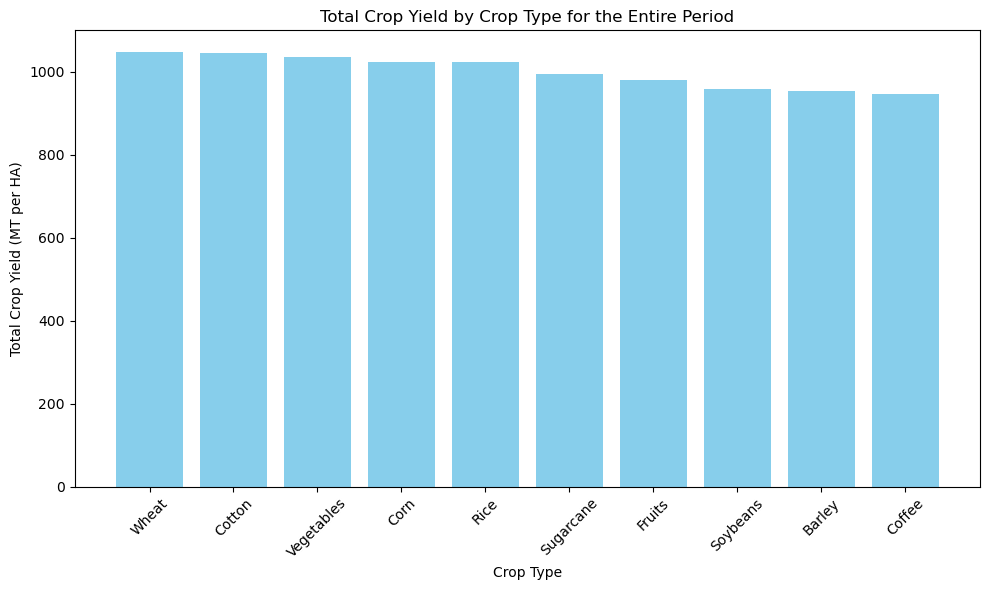

In [ ]:
### Group by 'Crop_Type' and calculate the average crop yield
crop_yield_by_type = climatedata.groupby('Crop_Type')['Crop_Yield_MT_per_HA'].count().reset_index()

### Sort the values for better visualization (optional)
crop_yield_by_type = crop_yield_by_type.sort_values(by='Crop_Yield_MT_per_HA', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(crop_yield_by_type['Crop_Type'], crop_yield_by_type['Crop_Yield_MT_per_HA'], color='skyblue')

plt.xlabel('Crop Type')
plt.ylabel('Total Crop Yield (MT per HA)')
plt.title('Total Crop Yield by Crop Type for the Entire Period')
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()

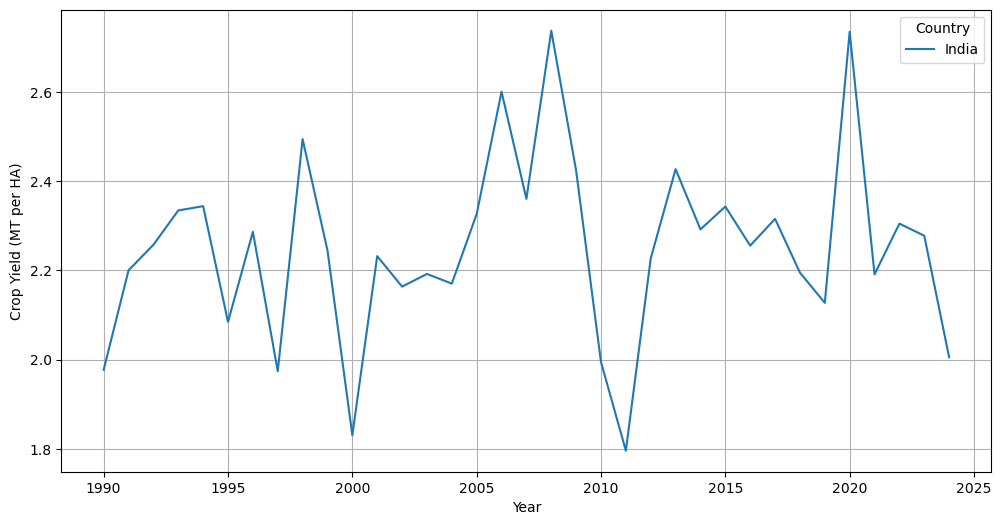

In [ ]:
### Name the countries you want to focus on
countries_of_interest = ['India']

### Filter the data to only include the countries of interest
filtered_climatedata = climatedata[climatedata['Country'].isin(countries_of_interest)]

### Group by 'Year' and 'Country' and calculate the average crop yield per year
yearly_crop_yield = filtered_climatedata.groupby(['Year', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = yearly_crop_yield[yearly_crop_yield['Country'] == country]
    plt.plot(country_data['Year'], country_data['Crop_Yield_MT_per_HA'], label=country)

plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

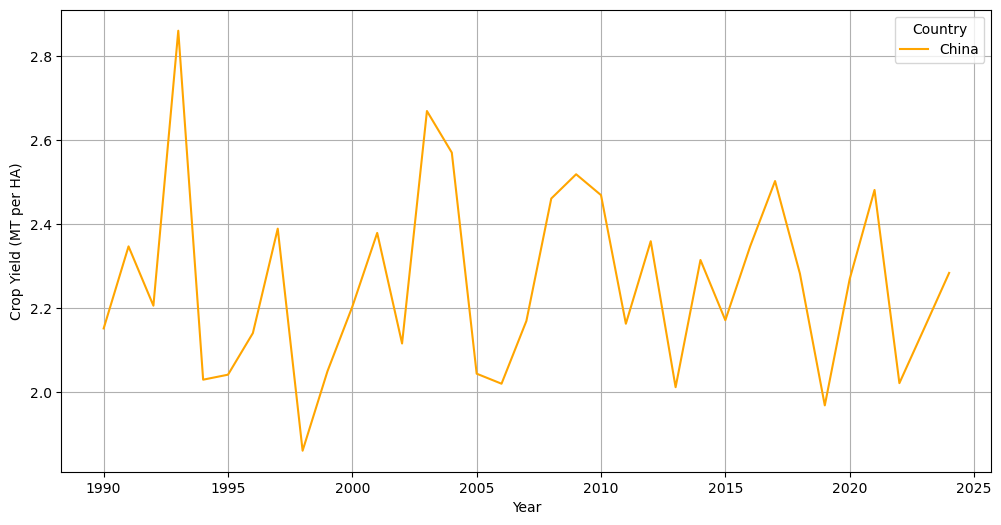

In [ ]:
### Name the countries you want to focus on
countries_of_interest = ['China']

### Filter the data to only include the countries of interest
filtered_climatedata = climatedata[climatedata['Country'].isin(countries_of_interest)]

### Group by 'Year' and 'Country' and calculate the average crop yield per year
yearly_crop_yield = filtered_climatedata.groupby(['Year', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = yearly_crop_yield[yearly_crop_yield['Country'] == country]
    plt.plot(country_data['Year'], country_data['Crop_Yield_MT_per_HA'], label=country, color='orange')

plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

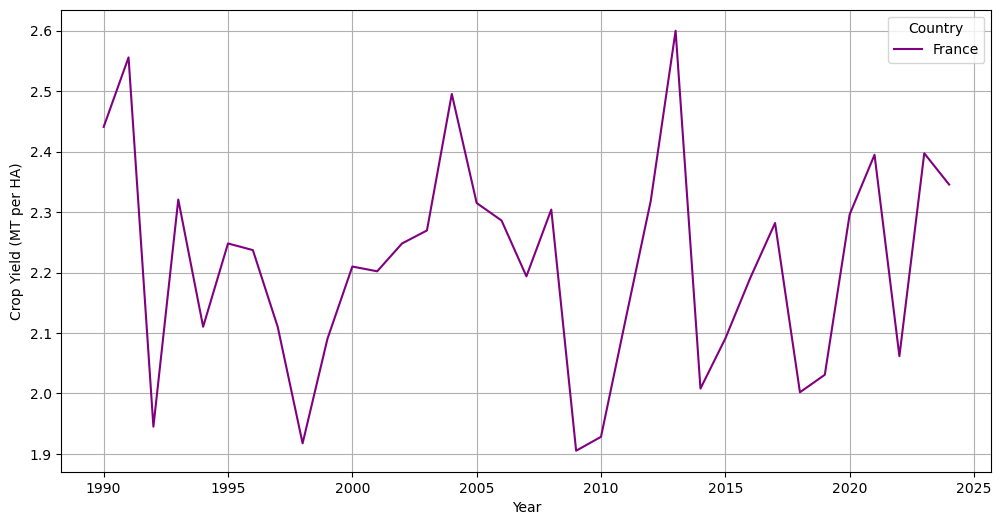

In [ ]:
### Name the countries you want to focus on
countries_of_interest = ['France']

### Filter the data to only include the countries of interest
filtered_climatedata = climatedata[climatedata['Country'].isin(countries_of_interest)]

### Group by 'Year' and 'Country' and calculate the average crop yield per year
yearly_crop_yield = filtered_climatedata.groupby(['Year', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = yearly_crop_yield[yearly_crop_yield['Country'] == country]
    plt.plot(country_data['Year'], country_data['Crop_Yield_MT_per_HA'], label=country, color= 'purple')

plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

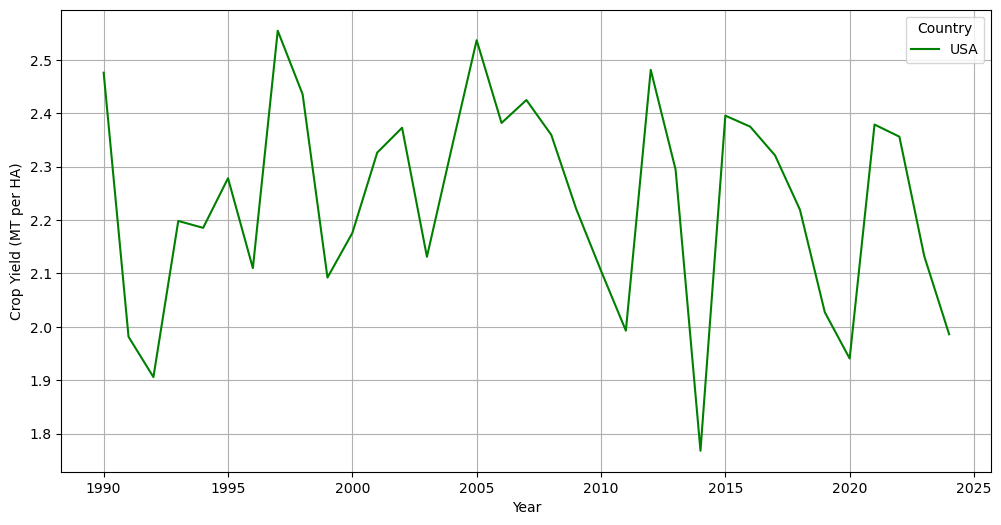

In [ ]:
### Name the countries you want to focus on
countries_of_interest = ['USA']

### Filter the data to only include the countries of interest
filtered_climatedata = climatedata[climatedata['Country'].isin(countries_of_interest)]

### Group by 'Year' and 'Country' and calculate the average crop yield per year
yearly_crop_yield = filtered_climatedata.groupby(['Year', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = yearly_crop_yield[yearly_crop_yield['Country'] == country]
    plt.plot(country_data['Year'], country_data['Crop_Yield_MT_per_HA'], label=country, color='green')

plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

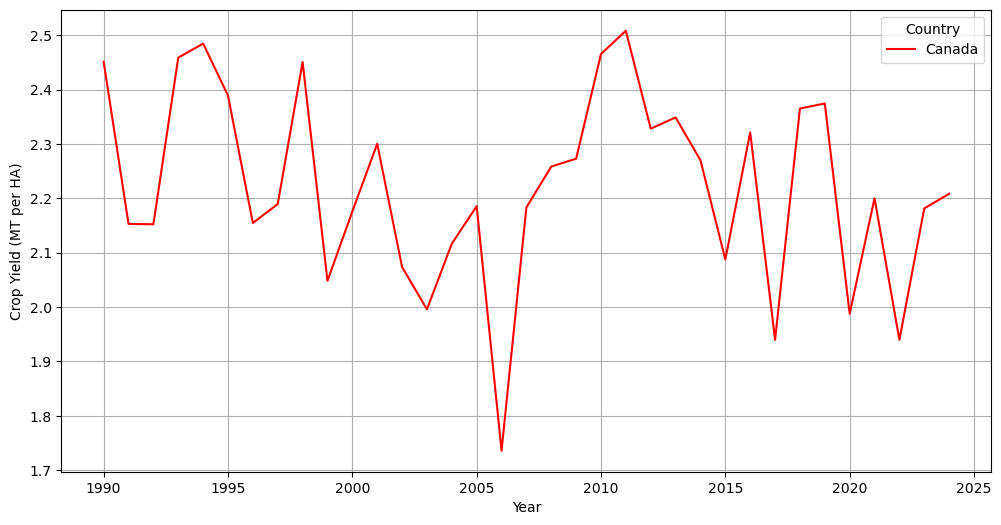

In [ ]:
### Name the countries you want to focus on
countries_of_interest = ['Canada']

### Filter the data to only include the countries of interest
filtered_climatedata = climatedata[climatedata['Country'].isin(countries_of_interest)]

### Group by 'Year' and 'Country' and calculate the average crop yield per year
yearly_crop_yield = filtered_climatedata.groupby(['Year', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = yearly_crop_yield[yearly_crop_yield['Country'] == country]
    plt.plot(country_data['Year'], country_data['Crop_Yield_MT_per_HA'], label=country, color='red')

plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

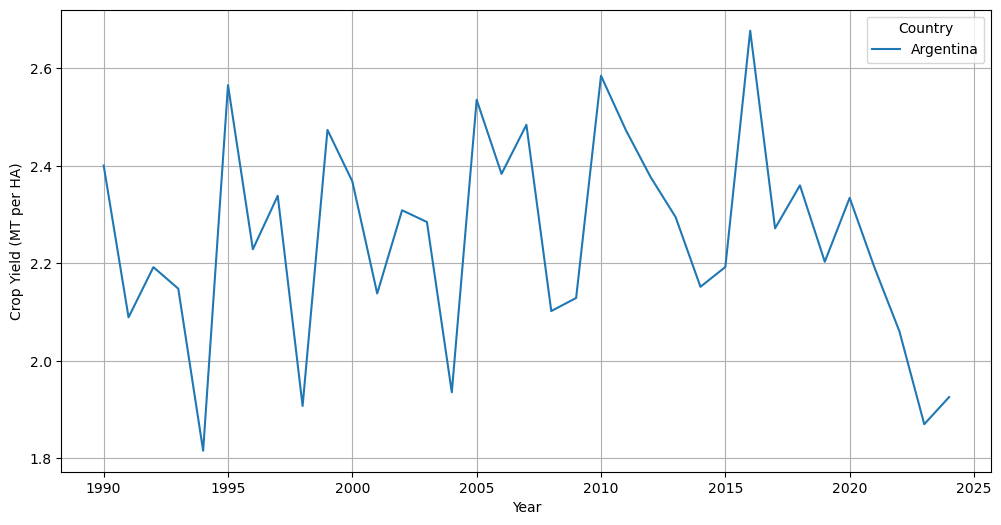

In [ ]:
### Name the countries you want to focus on
countries_of_interest = ['Argentina']

### Filter the data to only include the countries of interest
filtered_climatedata = climatedata[climatedata['Country'].isin(countries_of_interest)]

### Group by 'Year' and 'Country' and calculate the average crop yield per year
yearly_crop_yield = filtered_climatedata.groupby(['Year', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = yearly_crop_yield[yearly_crop_yield['Country'] == country]
    plt.plot(country_data['Year'], country_data['Crop_Yield_MT_per_HA'], label=country)

plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

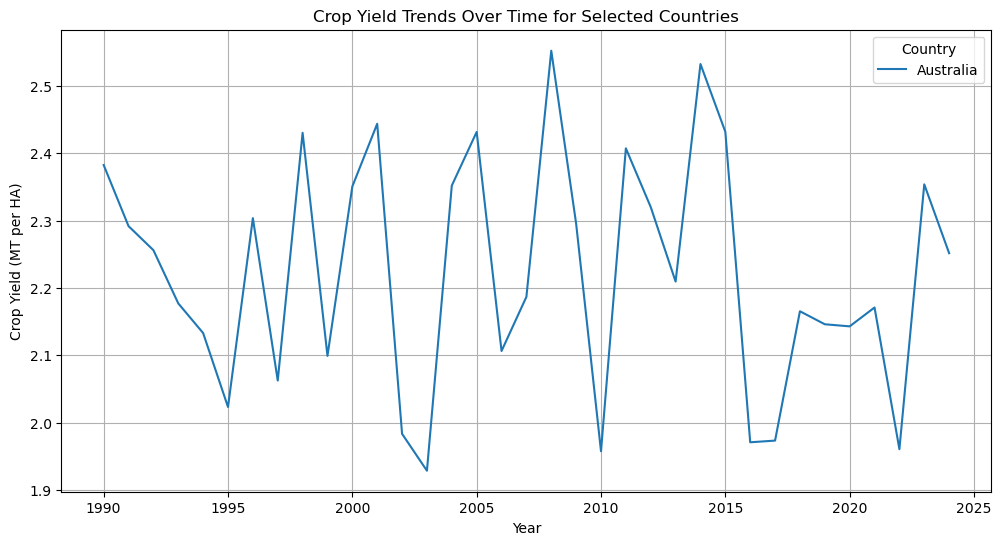

In [ ]:
### Name the countries you want to focus on
countries_of_interest = ['Australia']

### Filter the data to only include the countries of interest
filtered_climatedata = climatedata[climatedata['Country'].isin(countries_of_interest)]

### Group by 'Year' and 'Country' and calculate the average crop yield per year
yearly_crop_yield = filtered_climatedata.groupby(['Year', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = yearly_crop_yield[yearly_crop_yield['Country'] == country]
    plt.plot(country_data['Year'], country_data['Crop_Yield_MT_per_HA'], label=country)

plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.title('Crop Yield Trends Over Time for Selected Countries')
plt.legend(title='Country')
plt.grid(True)
plt.show()

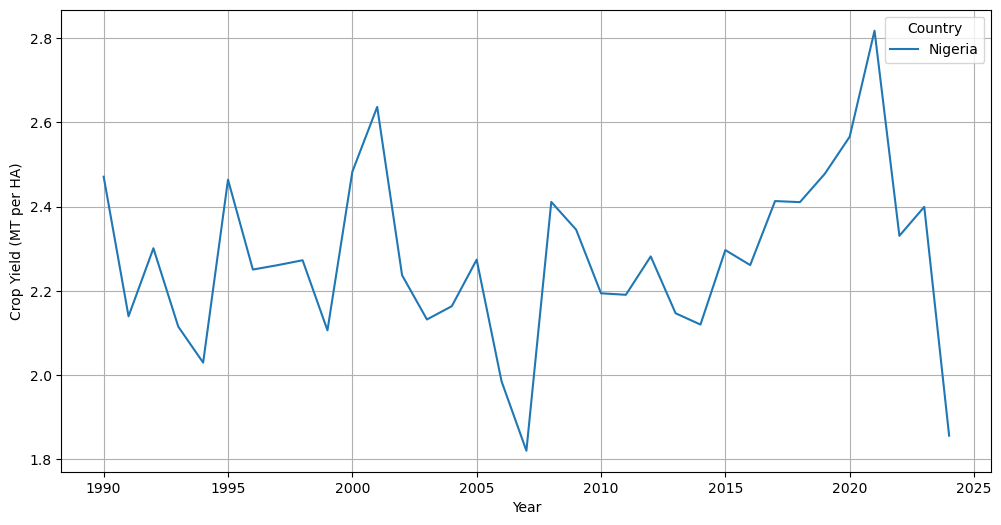

In [ ]:
### Name the countries you want to focus on
countries_of_interest = ['Nigeria']

### Filter the data to only include the countries of interest
filtered_climatedata = climatedata[climatedata['Country'].isin(countries_of_interest)]

### Group by 'Year' and 'Country' and calculate the average crop yield per year
yearly_crop_yield = filtered_climatedata.groupby(['Year', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = yearly_crop_yield[yearly_crop_yield['Country'] == country]
    plt.plot(country_data['Year'], country_data['Crop_Yield_MT_per_HA'], label=country)

plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

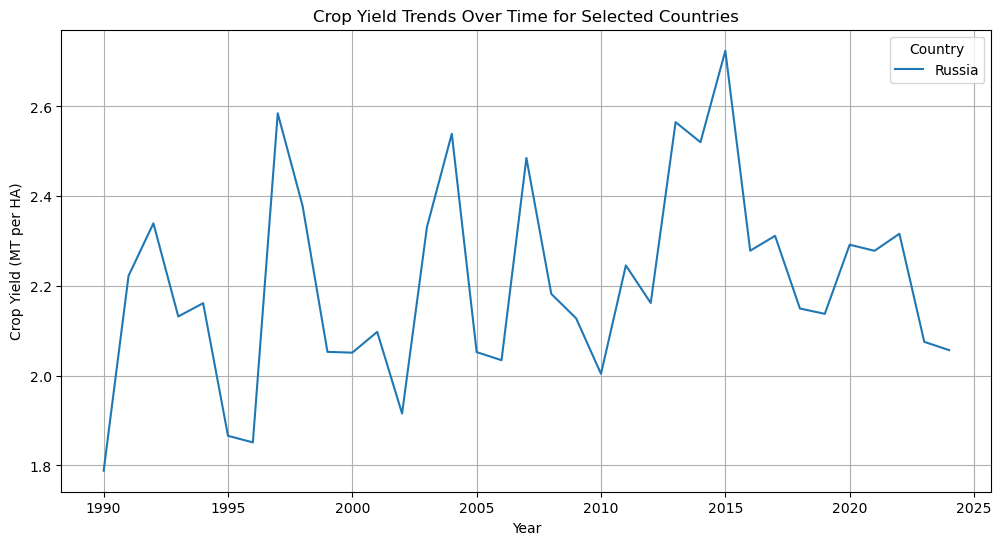

In [ ]:
### Name the countries you want to focus on
countries_of_interest = ['Russia']

### Filter the data to only include the countries of interest
filtered_climatedata = climatedata[climatedata['Country'].isin(countries_of_interest)]

### Group by 'Year' and 'Country' and calculate the average crop yield per year
yearly_crop_yield = filtered_climatedata.groupby(['Year', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = yearly_crop_yield[yearly_crop_yield['Country'] == country]
    plt.plot(country_data['Year'], country_data['Crop_Yield_MT_per_HA'], label=country)

plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.title('Crop Yield Trends Over Time for Selected Countries')
plt.legend(title='Country')
plt.grid(True)
plt.show()

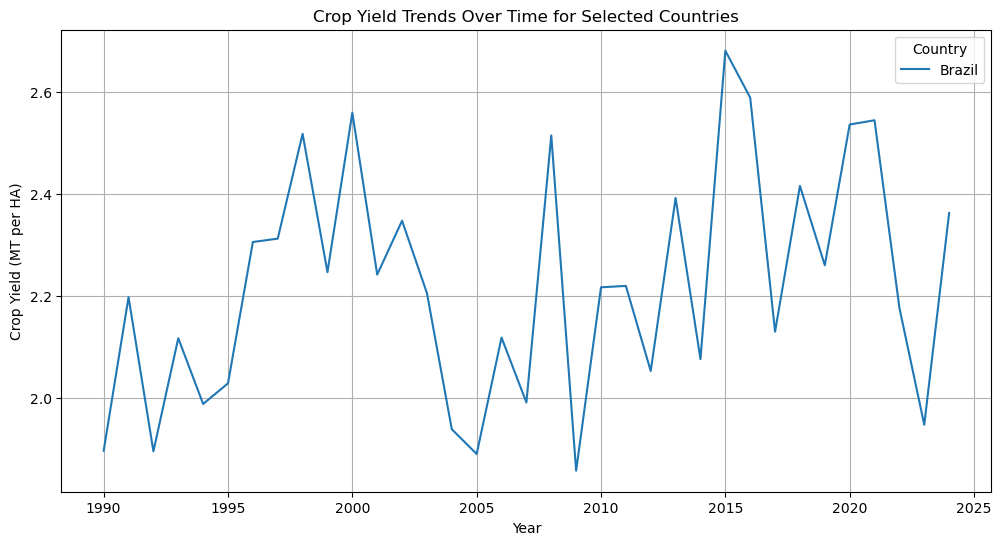

In [ ]:
### Name the countries you want to focus on
countries_of_interest = ['Brazil']

### Filter the data to only include the countries of interest
filtered_climatedata = climatedata[climatedata['Country'].isin(countries_of_interest)]

### Group by 'Year' and 'Country' and calculate the average crop yield per year
yearly_crop_yield = filtered_climatedata.groupby(['Year', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = yearly_crop_yield[yearly_crop_yield['Country'] == country]
    plt.plot(country_data['Year'], country_data['Crop_Yield_MT_per_HA'], label=country)

plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.title('Crop Yield Trends Over Time for Selected Countries')
plt.legend(title='Country')
plt.grid(True)
plt.show()

In [ ]:
### Create new interaction features
climatedata['Temp_Precip_Interaction'] = climatedata['Average_Temperature_C'] * climatedata['Total_Precipitation_mm']
climatedata['CO2_Temp_Interaction'] = climatedata['CO2_Emissions_MT'] * climatedata['Average_Temperature_C']

In [13]:
climatedata

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Temp_Precip_Interaction,CO2_Temp_Interaction
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13,692.9430,23.5910
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22,9410.8311,96.3186
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96,27479.7314,543.5825
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32,32148.9260,387.3935
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72,3564.1812,25.8639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022,France,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,No Adaptation,1483.06,20907.1464,537.6672
9996,1999,Australia,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,No Adaptation,829.61,24400.4214,101.7804
9997,2000,Argentina,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,Water Management,155.99,11419.6992,830.2392
9998,1996,Brazil,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,Crop Rotation,1613.90,21615.8040,241.4745


### DATA PREPROCESSING

In [13]:
### Define features and target variables                                                                                                             
X = climatedata[['Crop_Type', 'Average_Temperature_C', 
        'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events']]

y = climatedata[['Crop_Yield_MT_per_HA']]

In [15]:
### Encode categorical features
### If there are categorical features, encode them using OneHotEncoder.                                                             
X = pd.get_dummies(X, columns=['Crop_Type'])

In [19]:
X

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Extreme_Weather_Events,Crop_Type_Barley,Crop_Type_Coffee,Crop_Type_Corn,Crop_Type_Cotton,Crop_Type_Fruits,Crop_Type_Rice,Crop_Type_Soybeans,Crop_Type_Sugarcane,Crop_Type_Vegetables,Crop_Type_Wheat
0,1.55,447.06,15.22,8,False,False,True,False,False,False,False,False,False,False
1,3.23,2913.57,29.82,8,False,False,True,False,False,False,False,False,False,False
2,21.11,1301.74,25.75,5,False,False,False,False,False,False,False,False,False,True
3,27.85,1154.36,13.91,5,False,True,False,False,False,False,False,False,False,False
4,2.19,1627.48,11.81,9,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30.48,685.93,17.64,9,False,False,False,True,False,False,False,False,False,False
9996,9.53,2560.38,10.68,4,False,False,False,False,False,False,True,False,False,False
9997,31.92,357.76,26.01,10,False,True,False,False,False,False,False,False,False,False
9998,13.95,1549.52,17.31,2,False,False,False,False,False,False,True,False,False,False


In [21]:
y

,Crop_Yield_MT_per_HA
0,1.737
1,1.737
2,1.719
3,3.890
4,1.080
...,...
9995,3.033
9996,2.560
9997,1.161
9998,3.348


In [17]:
### Split the dataset into training and testing sets                                                                                 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [19]:
### Standardize the features                                                                                                                         
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### MODEL BUILDING

In [21]:
### Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=24)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=24)

In [23]:
### Make predictions                                                                                                                                 
y_pred = model.predict(X_test)

In [25]:
print("Predicted values:", y_pred)

Predicted values: [3.56581 3.32944 2.4628  ... 3.22009 2.28418 1.53074]


In [27]:
### Evaluate the model                                                                                                              
mse_yield = mean_squared_error(y_test['Crop_Yield_MT_per_HA'], y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test['Crop_Yield_MT_per_HA'], y_pred)
r2 = r2_score(y_test['Crop_Yield_MT_per_HA'], y_pred)
evs = explained_variance_score(y_test['Crop_Yield_MT_per_HA'], y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Explained Variance Score: {evs}")
print(f'Crop Yield = MSE: {mse_yield}')

Root Mean Squared Error: 0.8498397938825882
Mean Absolute Error: 0.7174107899999999
R-squared: 0.2448792571320474
Explained Variance Score: 0.2449670762772853
Crop Yield = MSE: 0.7222276752664


In [ ]:
### Using Decision Tree Regressor                                                                                                                                                                      

### Initialize and train the model
tree_model = DecisionTreeRegressor(random_state=24)
tree_model.fit(X_train, y_train)

### Make predictions
tree_pred = tree_model.predict(X_test)

### Evaluate the model
mse_tree_yield = mean_squared_error(y_test['Crop_Yield_MT_per_HA'], tree_pred)
mae = mean_absolute_error(y_test['Crop_Yield_MT_per_HA'], tree_pred)

print(f"Mean Absolute Error: {mae}")
print(f'Decision Tree = Crop Yield MSE: {mse_tree_yield}')

Mean Absolute Error: 0.948909
Decision Tree = Crop Yield MSE: 1.3931846559999999


In [ ]:
### Using XGBoost Regressor                                                                                                                                

### Initialize and train the model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=24)
xgb_model.fit(X_train, y_train)

### Make predictions
xgb_pred = xgb_model.predict(X_test)

### Evaluate the model
mse_xgb_yield = mean_squared_error(y_test['Crop_Yield_MT_per_HA'], xgb_pred)
mae = mean_absolute_error(y_test['Crop_Yield_MT_per_HA'], xgb_pred)

print(f"Mean Absolute Error: {mae}")
print(f'XGBoost = Crop Yield MSE: {mse_xgb_yield}')

Mean Absolute Error: 0.7440634807114601
XGBoost = Crop Yield MSE: 0.794213934289412


In [ ]:
### LightGBM Regressor
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=24) 
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

### Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f'LightGBM = MSE: {mse}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 14
[LightGBM] [Info] Start training from score 2.238609
Mean Absolute Error: 0.7143142367841897
LightGBM = MSE: 0.7096133335537417


In [ ]:
### Using Support Vector Regressor                                                                                                                  

### Initialize and train the model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

### Make predictions
svr_pred = svr_model.predict(X_test)

### Evaluate the model
mse_svr_yield = mean_squared_error(y_test['Crop_Yield_MT_per_HA'], svr_pred)
mae = mean_absolute_error(y_test, svr_pred)

print(f"Mean Absolute Error: {mae}")
print(f'SVR = Crop Yield MSE: {mse_svr_yield}')

Mean Absolute Error: 0.7623945435719889
SVR = Crop Yield MSE: 0.8301554348443926


In [ ]:
### Using K-Nearest Neighbors Regressor                                                                                                           

### Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

### Make predictions
knn_pred = knn_model.predict(X_test)

### Evaluate the model
mse_knn_yield = mean_squared_error(y_test['Crop_Yield_MT_per_HA'], knn_pred)
mae = mean_absolute_error(y_test, knn_pred)

print(f"Mean Absolute Error: {mae}")
print(f'KNN = Crop Yield MSE: {mse_knn_yield}')

Mean Absolute Error: 0.7706293000000001
KNN = Crop Yield MSE: 0.88141113974


In [ ]:
### Linear Regression                                                                                                                                     
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train) 
lr_pred = lr_model.predict(X_test)

### Evaluate the model
mse_lr_yield = mean_squared_error(y_test['Crop_Yield_MT_per_HA'], lr_pred)
mae = mean_absolute_error(y_test, lr_pred)

print(f"Mean Absolute Error: {mae}")
print(f'Linear Regression = Crop Yield MSE: {mse_lr_yield}')

Mean Absolute Error: 0.7733130935820055
Linear Regression = Crop Yield MSE: 0.8802775413199379


In [ ]:
### Using Gradient Boosting Regressor                                                                                                                                   

### Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=24)
gb_model.fit(X_train, y_train)

### Make predictions
gb_pred = gb_model.predict(X_test)

### Evaluate the model
mse_gb_yield = mean_squared_error(y_test['Crop_Yield_MT_per_HA'], gb_pred)
rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
mae = mean_absolute_error(y_test['Crop_Yield_MT_per_HA'], gb_pred)
r2 = r2_score(y_test['Crop_Yield_MT_per_HA'], gb_pred)
evs = explained_variance_score(y_test['Crop_Yield_MT_per_HA'], gb_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Explained Variance Score: {evs}")                              
print(f'Gradient Boosting = Crop Yield MSE: {mse_gb_yield}')

Root Mean Squared Error: 0.8233036391811792
Mean Absolute Error: 0.7012550095921392
R-squared: 0.29130014445568575
Explained Variance Score: 0.2914459422895789
Gradient Boosting = Crop Yield MSE: 0.6778288822889733


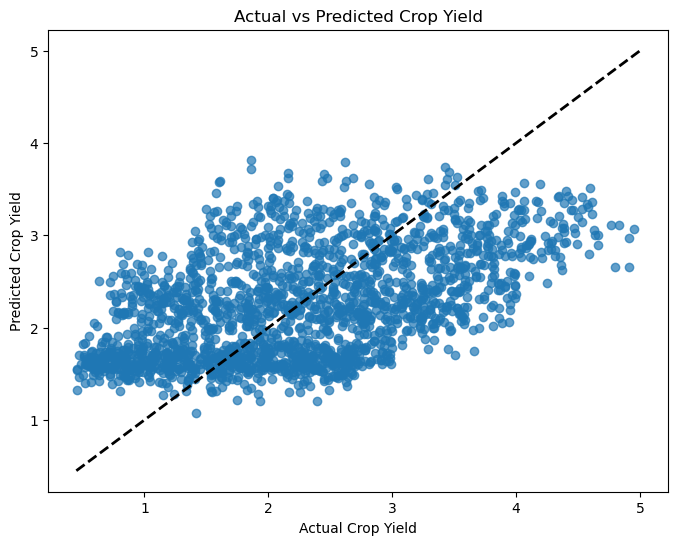

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()